In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np 

In [2]:
df=pd.read_csv("data.csv")
df.columns

Index(['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

# Preprocessing

In [3]:
df.isna().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [4]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [5]:
df.shape

(25160, 7)

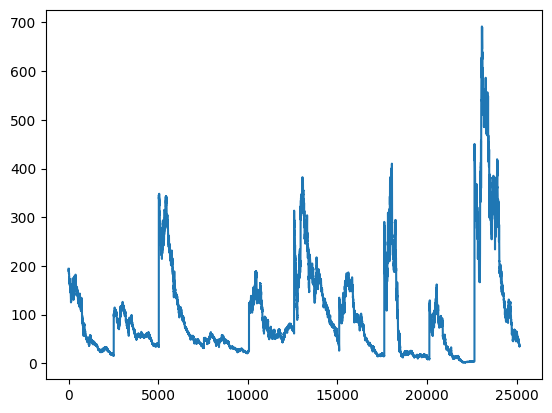

In [6]:
df1=df["Close/Last"]
df1 = df1.replace({r'\$':''}, regex=True).astype(float)
plt.plot(df1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# Training,Testing

In [8]:
training_Size=int(len(df1)*0.7)
test_size=len(df1)-training_Size
train_data,test_data=df1[0:training_Size,:],df1[training_Size:len(df1),:1]
training_Size,test_size

(17612, 7548)

In [9]:
def dataset(data,time_stamp=1):
    dataX,dataY=[],[]
    for i in range(len(data)-time_stamp-1):
        a=data[i:(i+time_stamp),0]
        dataX.append(a)
        dataY.append(data[i+time_stamp,0])
    return np.array(dataX),np.array(dataY)

In [10]:
time_stamp=100
X_train,Y_train= dataset(train_data,time_stamp)
X_test,Y_test=dataset(test_data,time_stamp)

In [11]:
print(X_train)
print(X_train.shape)

[[0.27876882 0.2739867  0.27376933 ... 0.21025403 0.21415219 0.21344211]
 [0.2739867  0.27376933 0.2726535  ... 0.21415219 0.21344211 0.21281899]
 [0.27376933 0.2726535  0.27020447 ... 0.21344211 0.21281899 0.21871694]
 ...
 [0.02527642 0.02534453 0.02574956 ... 0.02025954 0.01963569 0.01931253]
 [0.02534453 0.02574956 0.02554016 ... 0.01963569 0.01931253 0.01946614]
 [0.02574956 0.02554016 0.02568942 ... 0.01931253 0.01946614 0.01964149]]
(17511, 100)


In [12]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# LSTM

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [17]:
model=Sequential()
model.add(Input(shape=(100, 1)))    
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - loss: 4.7585e-04 - val_loss: 0.0014
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 31s 114ms/step - loss: 1.7555e-04 - val_loss: 6.5842e-04
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - loss: 1.4382e-04 - val_loss: 4.5095e-04
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 33s 121ms/step - loss: 1.1903e-04 - val_loss: 3.9198e-04
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 31s 113ms/step - loss: 1.0429e-04 - val_loss: 3.2715e-04


In [20]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

548/548 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


In [21]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

113.47304105567179

In [23]:
math.sqrt(mean_squared_error(Y_test,test_predict))

192.18004503920108

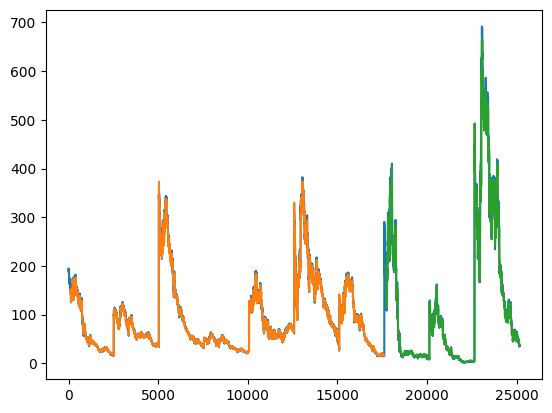

In [24]:
look_back=100
train_predict_plot=np.empty_like(df1)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]=train_predict

test_predict_plot=np.empty_like(df1)
test_predict_plot[:,:]=np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [25]:
len(test_data)

7548

In [26]:
x_input=test_data[7448:].reshape(-1,1)
x_input.shape

(100, 1)

In [27]:
tempinput=list(x_input)
tempinput=tempinput[0].tolist()

In [28]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(tempinput)>100):
        x_input=np.array(tempinput[1:])
        print("{} dat input".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        tempinput.extend(yhat[0].tolist())
        tempinput=tempinput[1:]
        lst_output.extend(yhat[0].tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        tempinput.extend(yhat[0].tolist())
        print(len(tempinput))
        lst_output.extend(yhat[0].tolist())
        i=i+1
print(lst_output)        

[0.05039227]
2
[0.05039227]
3
[0.05039227]
4
[0.05039227]
5
[0.05039227]
6
[0.05039227]
7
[0.05039227]
8
[0.05039227]
9
[0.05039227]
10
[0.05039227]
11
[0.05039227]
12
[0.05039227]
13
[0.05039227]
14
[0.05039227]
15
[0.05039227]
16
[0.05039227]
17
[0.05039227]
18
[0.05039227]
19
[0.05039227]
20
[0.05039227]
21
[0.05039227]
22
[0.05039227]
23
[0.05039227]
24
[0.05039227]
25
[0.05039227]
26
[0.05039227]
27
[0.05039227]
28
[0.05039227]
29
[0.05039227]
30
[0.05039227]
31
[0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.0503922700881958, 0.05039

In [29]:
day_new=np.arange(1,101)
day_predict=np.arange(101,131)

In [30]:
len(df1)

25160

In [31]:
df3=df1.tolist()
df3.extend(lst_output)
lst_output = np.array(lst_output)

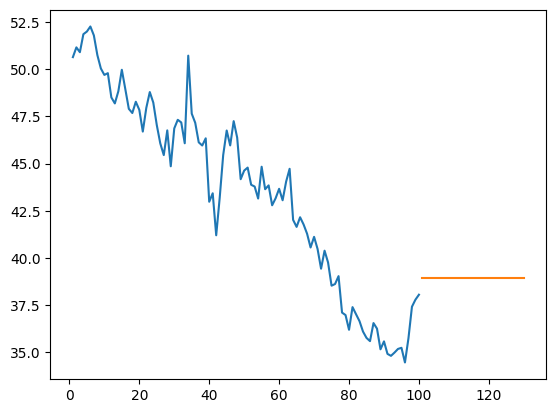

In [59]:
plt.plot(day_new,scaler.inverse_transform(df1[-100:].reshape(-1, 1)))
plt.plot(day_predict,scaler.inverse_transform(lst_output.reshape(-1, 1)))
plt.show()